<a href="https://colab.research.google.com/github/LonghuaHu/deep-learning/blob/master/CNN_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip3 install Pillow

In [0]:
import zipfile
with zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/catdog/training/Archive.zip","r") as zip_ref:
    zip_ref.extractall("/content/drive/My Drive/Colab Notebooks/catdog/images")

Working with 25000 images
Image examples: 
1_3391.jpg


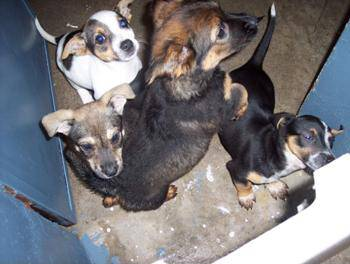

1_12345.jpg


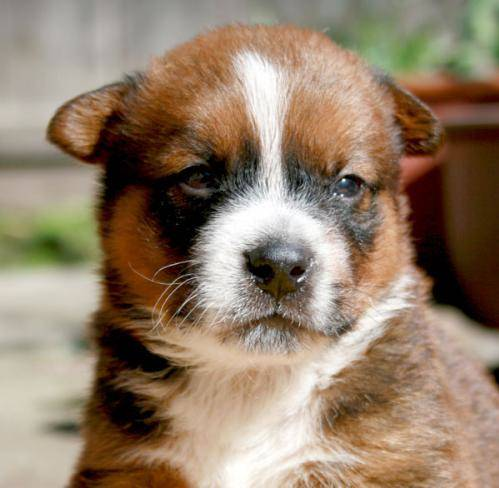

0_1592.jpg


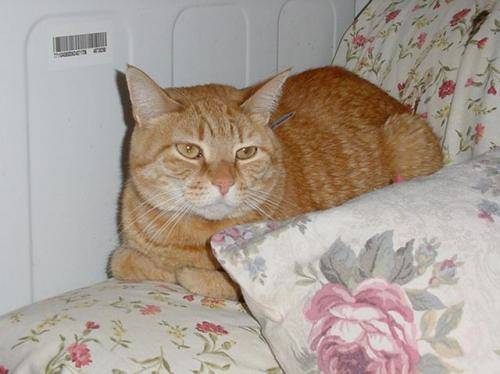

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

folder = "/content/drive/My Drive/Colab Notebooks/catdog/images"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(42, 45):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=150, height=150))

# Any results you write to the current directory are saved as output.

In [36]:
import imageio
from scipy import ndimage, misc

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 150
image_height = 150
channels = 3

nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

print(dataset.shape)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    img = img.resize((150,150))
    #print(img.size)
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape(3,150,150)
    # Normalize
    x = x / 255.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

Files in train_files: 25000
(25000, 3, 150, 150)
250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
5250 images to array
5500 images to array
5750 images to array
6000 images to array
6250 images to array
6500 images to array
6750 images to array
7000 images to array
7250 images to array
7500 images to array
7750 images to array
8000 images to array
8250 images to array
8500 images to array
8750 images to array
9000 images to array
9250 images to array
9500 images to array
9750 images to array
10000 images to array
10250 images to array
10500 images to array
10750 images to array
11000 images to array
11250 images to array
115

In [37]:

X = dataset.reshape(len(train_files), image_height, image_width,channels)
print(X.shape)

(25000, 150, 150, 3)


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
import h5py 
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
X, y_train, test_size=0.996, random_state=42)

In [39]:
print(X_train_cnn.shape)
print(X_test_cnn.shape)
print(len(y_train_cnn))
print(len(y_test_cnn))

(100, 150, 150, 3)
(24900, 150, 150, 3)
100
24900


In [0]:
import os
import tensorflow as tf
from keras.callbacks import TensorBoard

In [41]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 33, 33, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 128)      

In [42]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_cnn = model.fit(X_train_cnn, y_train_cnn, epochs=20, verbose=1)
test_loss = model.evaluate(X_test_cnn, y_test_cnn)

Epoch 1/20
100/100 [==============================] - 1s 10ms/sample - loss: 5.3579 - acc: 0.5400
Epoch 2/20
100/100 [==============================] - 0s 3ms/sample - loss: 1.5456 - acc: 0.7700
Epoch 3/20
100/100 [==============================] - 0s 3ms/sample - loss: 1.5457 - acc: 0.7400
Epoch 4/20
100/100 [==============================] - 0s 3ms/sample - loss: 0.8764 - acc: 0.8400
Epoch 5/20
100/100 [==============================] - 0s 3ms/sample - loss: 0.1140 - acc: 0.9600
Epoch 6/20
100/100 [==============================] - 0s 3ms/sample - loss: 0.1300 - acc: 0.9500
Epoch 7/20
100/100 [==============================] - 0s 2ms/sample - loss: 0.1141 - acc: 0.9500
Epoch 8/20
100/100 [==============================] - 0s 3ms/sample - loss: 0.0932 - acc: 0.9800
Epoch 9/20
100/100 [==============================] - 0s 3ms/sample - loss: 0.0114 - acc: 1.0000
Epoch 10/20
100/100 [==============================] - 0s 3ms/sample - loss: 0.0024 - acc: 1.0000
Epoch 11/20
100/100 [=======